In [2]:
import cv2
import urllib
import numpy as np
import matplotlib.pyplot as plt

# Input your image
I'm using an online example. You should import the different test cases provided.

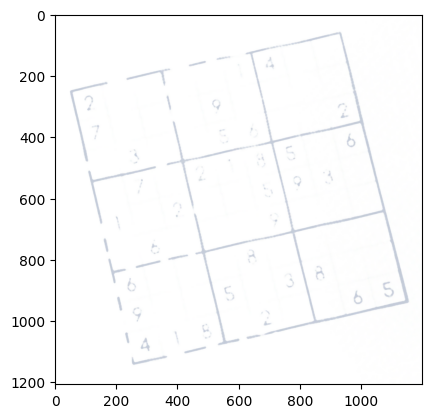

In [3]:
# Switch between the following two samples if you want to see different examples
#req = urllib.request.urlopen('https://live.staticflickr.com/8027/6978422072_33ac92fe1a_b.jpg')
# req = urllib.request.urlopen('https://sources.roboflow.com/dcbM99GUgvVCEMo4F2rq8vaVApB2/DSJGI2e7g77XqctWIGQG/original.jpg')
#arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
#img = cv2.imdecode(arr, -1) # 'Load it as it is'
img = cv2.imread("d:\Ain Shams University\Senior-1\Computer Vision\Project\Materials\Official TestCases\Succ/16-SomethingWentTerriblyWrongHere.jpg")
img = cv2.copyMakeBorder(img, 7, 0, 0, 0, cv2.BORDER_WRAP)
img = cv2.medianBlur(img, 9)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HOUGH = True
HARRIS = False
plt.imshow(img_rgb)

# Convert to grayscale
We don't need any color information.

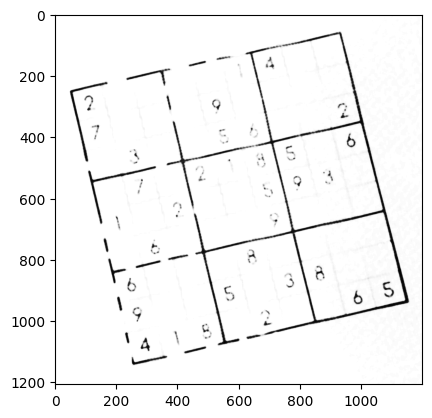

In [4]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])

black_pixels = hist[0:128]

# Find the intensity value with the maximum count (peak of the histogram)
peak_intensity = np.argmax(black_pixels)
Equalized_image = False
# Check if the count at the peak is greater than a certain threshold
if hist[peak_intensity] > 600000:
    print("Equalized")
    Equalized_image = True
    img_gray = cv2.equalizeHist(img_gray)

plt.imshow(img_gray, cmap="gray");

# Thresholding step
We don't need the full scale of grayscale either, just binary. But, is ordinary thresholding enough? Or is "adaptive thresholding" better?

Do your research!

1387922 1448400 0.9582449599558133


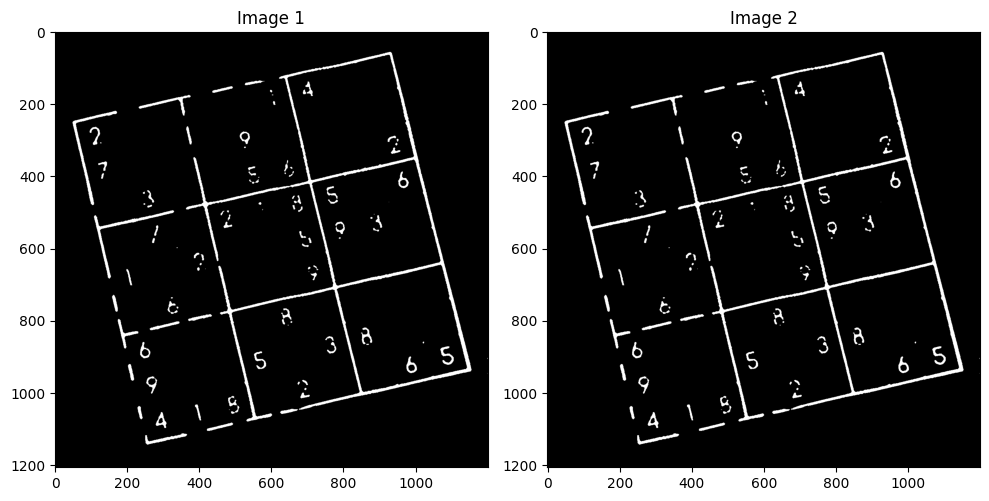

In [5]:
img_gray_threshed = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111,
    C=5
)

img_gray_threshed2 = cv2.adaptiveThreshold(src=img_gray,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=111, #we need to increase the blocksize so the gaps are filled
    C=5
)


non_zero_pixels = cv2.countNonZero(img_gray_threshed2)
imgheight, imgwidth = img.shape[:2]
total_pixels = imgheight * imgwidth

zero_pixels = total_pixels - non_zero_pixels

percentage = zero_pixels / total_pixels

print(zero_pixels, total_pixels , percentage)


if percentage < 0.82:
    print("Dark Mode")
    if Equalized_image:
        img_gray_threshed2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 1)
        
    else:
        img_gray_threshed2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV ,51, 5) 

    # img_gray_threshed2 = cv2.bitwise_not(img_gray_threshed2)


# plt.imshow(img_gray_threshed, cmap="gray");
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Show the first image
axes[0].imshow(img_gray_threshed, cmap="gray")
axes[0].set_title('Image 1')

# Show the second image
axes[1].imshow(img_gray_threshed2, cmap="gray")
axes[1].set_title('Image 2')

plt.tight_layout()

# Show the plots
plt.show()


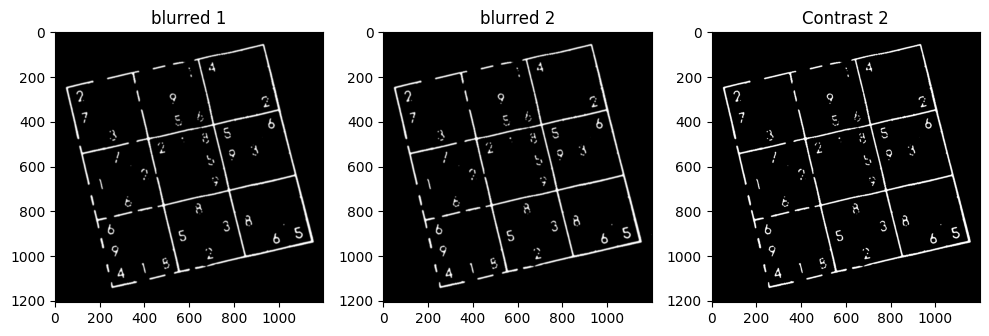

In [6]:
# Get the size of the image
height, width = img.shape[:2]

# Calculate the size of the Gaussian kernel
kernel_size = int(width * 0.01) if width > height else int(height * 0.01)

# The kernel size should be odd
if kernel_size % 2 == 0:
    kernel_size += 1

#(7,7) temp--> should be (kernel_size,kernel_size)
blur_mat = (7,7) 
# Increase the contrast (double it)
contrast_img = cv2.convertScaleAbs(img_gray_threshed, alpha=2, beta=0)
contrast_img2 = cv2.convertScaleAbs(img_gray_threshed2, alpha=2, beta=0)

blurred = cv2.GaussianBlur(contrast_img, blur_mat, 0)
blurred2 = cv2.GaussianBlur(contrast_img2, blur_mat, 0)

# binarized = cv2.threshold(blurred, 125, 255)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
# Show the first image
axes[0].imshow(blurred, cmap="gray")
axes[0].set_title('blurred 1')

# Show the second image
axes[1].imshow(blurred2, cmap="gray")
axes[1].set_title('blurred 2')

# Show the second image
axes[2].imshow(contrast_img2, cmap="gray")
axes[2].set_title('Contrast 2')
plt.tight_layout()

# Show the plots
plt.show()

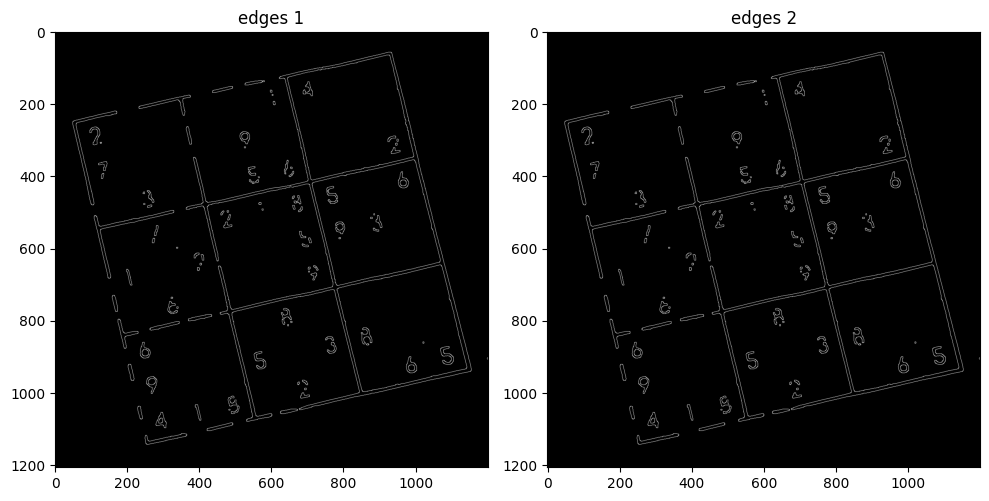

In [7]:
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
edges2 = cv2.Canny(blurred2, 50, 150, apertureSize=3)


fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# Show the first image
axes[0].imshow(edges, cmap="gray")
axes[0].set_title('edges 1')

# Show the second image
axes[1].imshow(edges2, cmap="gray")
axes[1].set_title('edges 2')

plt.tight_layout()

# Show the plots
plt.show()

# Extra 
Get Intersections by Horizontal & Vertical Lines

fig, axes = plt.subplots(1, 3, figsize=(10, 5))

mask = np.zeros((blurred2.shape),np.uint8)
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

close = cv2.morphologyEx(blurred2,cv2.MORPH_CLOSE,kernel1)
div = np.float32(blurred2)/(close)
res = np.uint8(cv2.normalize(div,div,0,255,cv2.NORM_MINMAX))
res2 = cv2.cvtColor(res,cv2.COLOR_GRAY2BGR)
contour,hier = cv2.findContours(img_gray_threshed2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
for cnt in contour:
    area = cv2.contourArea(cnt)
    if area > 1000:
        if area > max_area:
            max_area = area
            best_cnt = cnt

cv2.drawContours(mask,[best_cnt],0,255,-1)
cv2.drawContours(mask,[best_cnt],0,0,2)

res = cv2.bitwise_and(res,mask)
kernelx = cv2.getStructuringElement(cv2.MORPH_RECT,(2,10))

dx = cv2.Sobel(res,cv2.CV_16S,1,0)
dx = cv2.convertScaleAbs(dx)
cv2.normalize(dx,dx,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dx,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernelx,iterations = 1)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if h/w > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)
close = cv2.morphologyEx(close,cv2.MORPH_CLOSE,None,iterations = 2)
closex = close.copy()
kernely = cv2.getStructuringElement(cv2.MORPH_RECT,(10,2))
dy = cv2.Sobel(res,cv2.CV_16S,0,2)
dy = cv2.convertScaleAbs(dy)
cv2.normalize(dy,dy,0,255,cv2.NORM_MINMAX)
ret,close = cv2.threshold(dy,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
close = cv2.morphologyEx(close,cv2.MORPH_DILATE,kernely)

contour, hier = cv2.findContours(close,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contour:
    x,y,w,h = cv2.boundingRect(cnt)
    if w/h > 5:
        cv2.drawContours(close,[cnt],0,255,-1)
    else:
        cv2.drawContours(close,[cnt],0,0,-1)

close = cv2.morphologyEx(close,cv2.MORPH_DILATE,None,iterations = 2)
closey = close.copy()
res = cv2.bitwise_and(closex,closey)


# Show the first image
axes[0].imshow(closex, cmap="gray")
axes[0].set_title('Vertical Edges')

# Show the second image
axes[1].imshow(closey, cmap="gray")
axes[1].set_title('Horizontal Edges')

# Show the second image
axes[2].imshow(res, cmap="gray")
axes[2].set_title('Intersections')


plt.tight_layout()

# Show the plots
plt.show()



# Detect the lines
One way is to use Hough transform. It may not be the best way, there are other ways, and I've done zero noise removal in this guide so far.

This is very sub-optimal and will most likely not work reliably on all cases. Do your research!

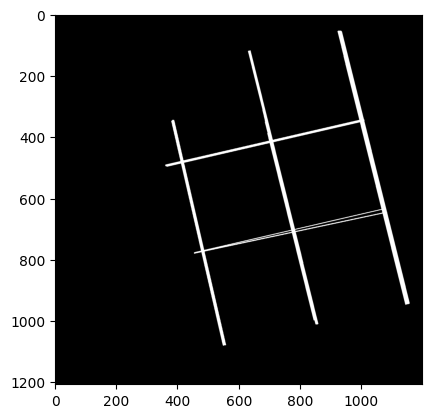

In [8]:
# Detect lines that are not smaller in length than:
minLineLength = min(edges2.shape[0],edges2.shape[1])/2

lines = cv2.HoughLinesP(
    image=blurred2,
    rho=1,
    theta=np.pi/180,
    threshold=200,
    minLineLength=minLineLength,
    maxLineGap=10
)

tmp_img = np.zeros_like(edges2, dtype = np.uint8)
for x1, y1, x2, y2 in lines[:,0]: cv2.line(tmp_img,(x1,y1),(x2,y2),(255,0,0),2)
plt.imshow(tmp_img, cmap='gray');

# Find the intersections between the lines
Lots of magic numbers here. How to tweak? How to generalize? Do your research!


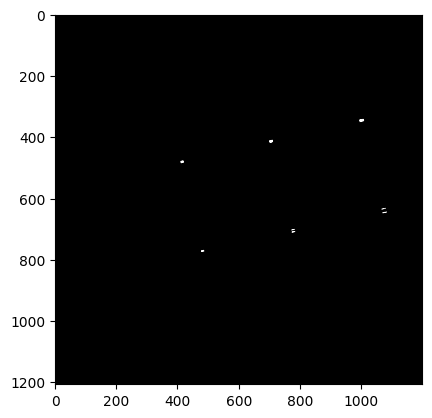

In [9]:
try:
    tmp_img2 = np.zeros_like(img_gray_threshed2, dtype = np.uint16)

    def angle_between_lines(line1, line2):
        l1x1, l1y1, l1x2, l1y2 = line1
        l2x1, l2y1, l2x2, l2y2 = line2
        a1 = np.rad2deg(np.arctan2(l1y2 - l1y1, l1x2 - l1x1))
        a2 = np.rad2deg(np.arctan2(l2y2 - l2y1, l2x2 - l2x1))
        return np.abs(a1 - a2)

    def intersection_point(line1, line2):
        # https://en.wikipedia.org/wiki/Line%E2%80%93line_intersection
        l1x1, l1y1, l1x2, l1y2 = line1
        l2x1, l2y1, l2x2, l2y2 = line2
        nx = (l1x1*l1y2-l1y1*l1x2)*(l2x1-l2x2)-(l2x1*l2y2-l2y1*l2x2)*(l1x1-l1x2)
        ny = (l1x1*l1y2-l1y1*l1x2)*(l2y1-l2y2)-(l2x1*l2y2-l2y1*l2x2)*(l1y1-l1y2)
        d = (l1x1-l1x2)*(l2y1-l2y2)-(l1y1-l1y2)*(l2x1-l2x2)
        px = int(nx / d)
        py = int(ny / d)
        return (px, py)

    def point_on_line(point, line):
        def distance(pfrom, pto): return np.sqrt((pfrom[0] - pto[0])**2 + (pfrom[1] - pto[1])**2)
        diff = distance(point, line[0:2]) + distance(point, line[2:4]) - distance(line[0:2], line[2:4])
        return np.abs(diff) < 75

    intersections = []
    num_of_lines = len(lines[:,0])
    for i in range(num_of_lines):
        for j in range(i+1, num_of_lines):
            line1 = lines[i,0]
            line2 = lines[j,0]
            if (line1 is line2): continue
            a = angle_between_lines(line1, line2)
            if (a < 80 or a > 100): continue
            p = intersection_point(line1, line2)
            if point_on_line(p, line1) and point_on_line(p, line2):
                tmp_img2[p[::-1]] = 5000
                intersections.append(p[::-1])



    plt.imshow(tmp_img2, cmap="gray", vmin=0, vmax=1255)

except:
    print("estandaf el camera")

232
188209.0


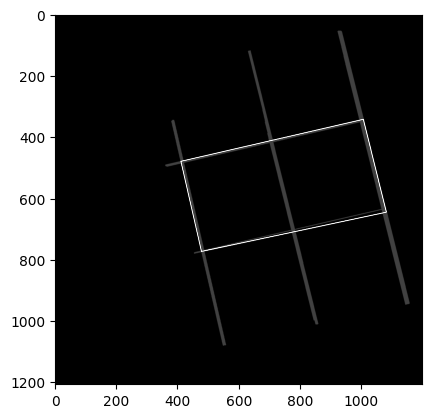

In [10]:
try: 
    p1 = sorted(intersections, key = lambda p: p[0] + p[1])[0] # topleft
    p2 = sorted(intersections, key = lambda p: p[0] - p[1])[0] # topright
    p3 = sorted(intersections, key = lambda p: p[0] + p[1])[-1] # bottright
    p4 = sorted(intersections, key = lambda p: p[1] - p[0])[0] # bottleft
    print(len(intersections))
    coords = np.int32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
    tmp_img3 = np.zeros_like(img_gray_threshed, dtype = np.int32)
    tmp_img3 = cv2.polylines(tmp_img3, coords, isClosed=True, color=(2550,0,0))
    #######################################################
    #Getting area of polygon
    coords_temp = [tuple(pt) for pt in coords[0]]
    xp = [p[0] for p in coords_temp]
    yp = [p[1] for p in coords_temp]
    area = 0.5 * abs(sum(xp[i-1]*yp[i] - xp[i]*yp[i-1] for i in range(len(coords_temp))))
    print(area)
    if area < 300000:
        HARRIS=True
        HOUGH=False
    plt.imshow(tmp_img3 + tmp_img, cmap="gray", vmax=1000)

except:
    print("Enta lessa mastandaftesh")

# Our Contours

In [11]:
# Find All contours using TREE
contours, _ = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Calculate the ratio for  700x700 Reference image
reference_total_area = 700 * 700
reference_threshold_area = 50000
reference_ratio = reference_threshold_area / reference_total_area
total_area = img.shape[0] * img.shape[1]
threshold_area = reference_ratio * total_area

filtered_contours = []
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
    if len(approx) == 4 and cv2.contourArea(approx) > threshold_area:
        filtered_contours.append(approx)

max_components = 0
outer_contour = None

for contour in filtered_contours:
    # Create a mask contains the contour filled in
    mask = np.zeros_like(edges2)
    cv2.drawContours(mask, [contour], -1, (255), thickness=cv2.FILLED)

    # Apply connectedComponents on the mask
    num_labels, labels = cv2.connectedComponents(mask)

    # If this contour has more connected components than the previous maximum, update the maximum
    if num_labels > max_components:
        max_components = num_labels
        outer_contour = contour

print("outer_contour Using Max Connected Components")
print(outer_contour)

if outer_contour is not None:
    # counter = 0
    # for x in contours:
    #     counter += 1
    #     for contour in x:
    #         cv2.circle(img, tuple(contour[0]), 10, (255, counter, 0), -1)

    # Draw all corner candidates in green
    for x in filtered_contours:
        for f in x:
            cv2.circle(img, tuple(f[0]), 10, (0, 255, 0), -1)

    # find EXTERNAL contours in masked image
    contours2, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filtered_contours2 = []
    for contour in contours2:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4 and cv2.contourArea(approx) > 10000:
            filtered_contours2.append(approx)

    #Get outermost contour
    outer_contour2 = max(filtered_contours2, key=cv2.contourArea)
    print("outer_contour2 Using FindContour() on Masked Image")
    print(outer_contour2)
    corners=outer_contour2

    # Draw the  selected corners in Yellow
    for corner in corners:
        cv2.circle(img, tuple(corner[0]), 10, (255, 255, 0), -1)

    ################################################################################
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Show the first image
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title('Image with corners')

    # Show the second image
    axes[1].imshow(mask, cmap="gray")
    axes[1].set_title('Masked Image')

    plt.tight_layout()

    # Show the plots
    plt.show()
else:
    pass


outer_contour Using Max Connected Components
None


# Harris Trial

255


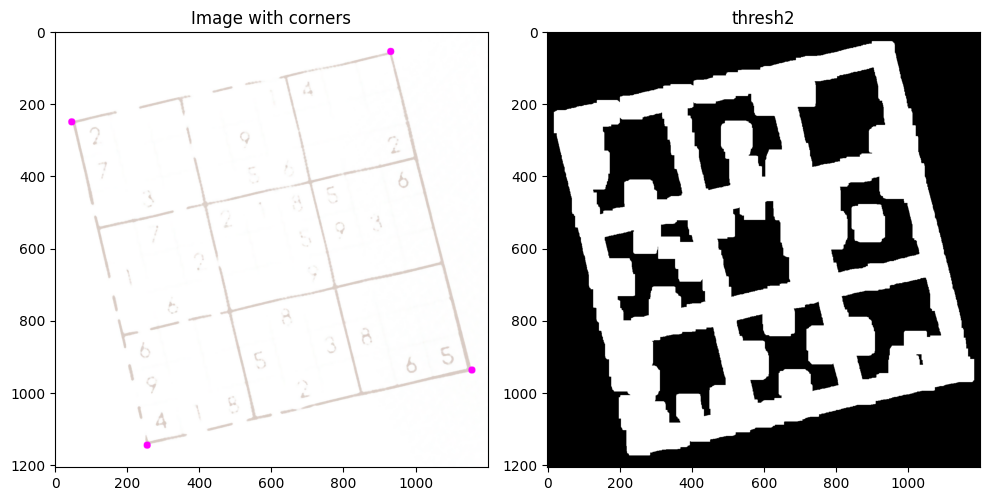

In [12]:
if outer_contour is None and HOUGH is False:    
    HARRIS = True
    cornersHARRIS = cv2.cornerHarris(
        src=img_gray_threshed2,  # Input single-channel 8-bit or floating-point image
        blockSize=11,  # Size of binary window (square)
        ksize=3,  # Aperture parameter for the Sobel operator (square)
        k=0.04,  # Harris detector free parameter between 0.04 and 0.06
    )
    thresh = cv2.threshold(cornersHARRIS, 0.01 * cornersHARRIS.max(), 255, cv2.THRESH_BINARY)[1]
    thresh = np.uint8(thresh)
    kernel = np.ones((11,11),np.uint8)
    thresh2 = cv2.dilate(thresh, kernel, iterations = 5)
    dilation_error_approx = (11*5)/2   #like center of kernel ((size*iterations)/2)

    contours, _ = cv2.findContours(thresh2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = []
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)
        if len(approx) == 4 and cv2.contourArea(approx) > 3500:
            filtered_contours.append(approx)

    outer_contour2 = max(filtered_contours, key=cv2.contourArea)
    corners= outer_contour2
    temp_corners = outer_contour2
    
    ###Fixing Dilation Error###
    corners[0][0][0]= temp_corners[0][0][0] - dilation_error_approx    #upright
    corners[0][0][1]= temp_corners[0][0][1] + dilation_error_approx    #upright
    corners[1]= temp_corners[1] + dilation_error_approx                ##upleft
    corners[2][0][0]= temp_corners[2][0][0] + dilation_error_approx     #downleft
    corners[2][0][1]= temp_corners[2][0][1] - dilation_error_approx     #downleft
    corners[3]= temp_corners[3] - dilation_error_approx                ##downright

    print(temp_corners[2][0][0])
    for corner in corners:
        cv2.circle(img, tuple(corner[0]), 10, (255, 0, 255), -1)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    # Show the first image
    axes[0].imshow(img, cmap="gray")
    axes[0].set_title('Image with corners')

    # Show the second image
    axes[1].imshow(thresh2, cmap="gray")
    axes[1].set_title('thresh2')

    plt.tight_layout()

    # Show the plots
    plt.show()

# Template Matching
Not Used

# template matching
template = cv2.imread('d:\Ain Shams University\Senior-1\Computer Vision\Project\Materials\Template\images.jpg', cv2.IMREAD_GRAYSCALE)

# Perform template matching
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCORR_NORMED)

# Set the threshold for matching results
threshold = 0.5

# Find locations where the matching score is above the threshold
loc = np.where(res >= threshold)

# Get the width and height of the template image
height, width = template.shape[::-1]

for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + width, pt[1] + height)
    cv2.rectangle(img, pt, bottom_right, (0, 0, 255), 2)
# Calculate the center point of the image
center_x = img_gray.shape[1] // 2
center_y = img_gray.shape[0] // 2

for pt in zip(*loc[::-1]):
    bottom_right = (pt[0] + width, pt[1] + height)
    cv2.rectangle(img, pt, bottom_right, (0, 0, 255), 2)

    # Reflect the bounding rectangle around the center
    reflected_pt = (
        center_x - (pt[0] - center_x),
        center_y - (pt[1] - center_y)
    )
    reflected_bottom_right = (
        center_x + (center_x - bottom_right[0]),
        center_y + (center_y - bottom_right[1])
    )
    cv2.rectangle(img, reflected_pt, reflected_bottom_right, (0, 0, 255), 2)
# Save the result image
cv2.imwrite('res2.png', img)
###################################

# Extra: Sort the Grid Corner-Points
Not used

In [13]:
def sort_points(points):
    #2D array of shape
    reshaped_points = points.reshape((4, 2))

    # Sort x-coordinate + y-coordinate TOP-LEFT
    sorted_points = reshaped_points[np.argsort(reshaped_points.sum(axis=1))]

    # Now, diff is negative for points with x > y (right of the main diagonal)
    diff = np.diff(sorted_points, axis=1)

    # Swap last two points if necessary to ensure clockwise order
    if diff[2] < diff[3]:
        sorted_points[2], sorted_points[3] = sorted_points[3], sorted_points[2].copy()

    # Reshape sorted points back to original format
    sorted_points = sorted_points.reshape(-1, 1, 2).astype(np.int32)

    return sorted_points

#corners=sort_points(corners)
#print(corners)

# Perform a perspective transform
Thankfully, if you got the frame right, this step is straight-forward. No research to be done here. (=

Just try not to go insane over the amount of inconsistency in coordinates between Numpy and OpenCV.

HARRIS


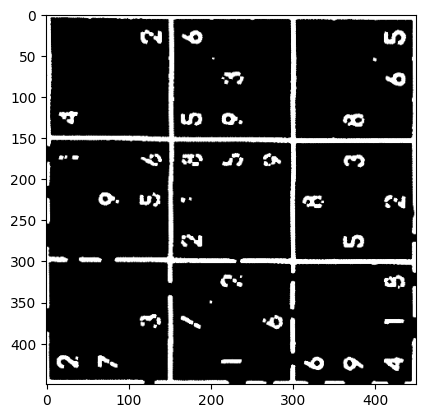

In [14]:
# Perspective transform
if outer_contour is not None or HARRIS:
    target_corners = np.float32([[0, 0], [0, 450], [450, 450],[450, 0] ])
    transform_matrix = cv2.getPerspectiveTransform(corners.astype(np.float32), target_corners)
    if Equalized_image:
        ret,img_gray_threshed2 = cv2.threshold(img_gray,77,255,cv2.THRESH_BINARY_INV)
    if HARRIS:
        print("HARRIS")
        kernel = np.ones((5,5),np.uint8)
        img_gray_threshed2 = cv2.dilate(img_gray_threshed2, kernel, iterations = 1)
        
    warped = cv2.warpPerspective(img_gray_threshed2, transform_matrix, (450, 450))
    plt.imshow(warped, cmap="gray");
else:
    y, x = img_gray_threshed2.shape
    src_coords = np.float32([[0,0], [x,0], [x,y], [0,y]])
    dst_coords = np.float32([[p1[::-1], p2[::-1], p3[::-1], p4[::-1]]])
    if Equalized_image:
        ret,img_gray_threshed2 = cv2.threshold(img_gray,77,255,cv2.THRESH_BINARY_INV)
        kernel = np.ones((5,5),np.uint8)
        #img_gray_threshed2 = cv2.dilate(img_gray_threshed2, kernel, iterations = 1)
    img_gray_threshed_warped = cv2.warpPerspective(
        src=img_gray_threshed2,
        M=cv2.getPerspectiveTransform(dst_coords, src_coords),
        dsize=img_gray_threshed2.shape[::-1]
    )
    plt.imshow(img_gray_threshed_warped, cmap="gray");

# Separate the number tiles

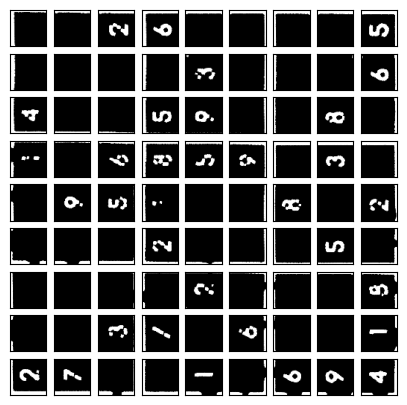

In [15]:
if outer_contour is not None or HARRIS:
    M = warped.shape[0] // 9
    N = warped.shape[1] // 9
    #Tolerance (in pixels)
    tolerance = 0

    number_tiles = []
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            # Add/subtract the tolerance from the slice indices
            tile = warped[max(0, i*M-tolerance):(i+1)*M+tolerance, max(0, j*N-tolerance):(j+1)*N+tolerance]
            number_tiles[i].append(tile)


    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
else:
    M = img_gray_threshed_warped.shape[0] // 9
    N = img_gray_threshed_warped.shape[1] // 9
    number_tiles = []
    for i in range(9):
        number_tiles.append([])
        for j in range(9):
            tile = img_gray_threshed_warped[i*M:(i+1)*M, j*N:(j+1)*N]
            number_tiles[i].append(tile)

    _, axes = plt.subplots(9, 9, figsize=(5, 5))
    for i, row in enumerate(axes):
        for j, col in enumerate(row):
            col.imshow(number_tiles[i][j], cmap="gray");
            col.get_xaxis().set_visible(False)
            col.get_yaxis().set_visible(False)
    